In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [2]:
data_LA = pd.read_csv("input/LA_total.csv",index_col=0)

data_LA

,MVI,diagnosticsVersionsPyRadiomics,diagnosticsVersionsNumpy,diagnosticsVersionsSimpleITK,diagnosticsVersionsPyWavelet,diagnosticsVersionsPython,diagnosticsConfigurationSettings,diagnosticsConfigurationEnabledImageTypes,diagnosticsImage-originalHash,diagnosticsImage-originalDimensionality,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
NAME,,,,,,,,,,,,,,,,,,,,,
L2,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",9d9c57f3423b40ad6e763dba02071c45e1aa9689,3D,...,51.839120,0.074850,3.740602,0.800000,0.354167,0.050417,0.243869,91.405412,0.212977,14.239747
L3-1,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",0223123fe4d1ae9c22628888f9903bc88d61166c,3D,...,238.780847,0.005940,6.069751,0.292089,36.146943,0.211162,0.007631,600.758394,0.077377,2.516069
L4,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",06d6647ba01091d61f0129488468eea839ac622b,3D,...,65.218149,0.021710,5.336672,0.362069,8.505215,0.250851,0.019561,188.434428,0.108164,2.089918
L5,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",6cec39af531a07016c190cf7c9692b7f87d2b82e,3D,...,30.216568,0.019912,5.830134,0.163609,613.974961,2.158984,0.003806,90.506291,0.043869,0.256246
L6,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",52f101911eb4060a38e4b72a7bce4c2a2ac8b249,3D,...,67.030533,0.015650,6.078266,0.213152,144.610495,0.674458,0.004682,269.756274,0.109584,0.760242
L10,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",52a963de649b82e35898cb7b833b83a8e849b9b8,3D,...,161.863600,0.004155,5.982552,0.303080,58.543116,0.744179,0.002866,453.340109,0.060954,0.660305
L11,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",d1642da4431c66b6ba99f748d29c81d5b5ba0fdc,3D,...,37.844637,0.019513,5.902139,0.133118,7408.001479,10.147702,0.000580,153.986679,0.026999,0.075459
L12,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",bded3d82be0b8876603a6a748acb48a8b1f1f28b,3D,...,199.001728,0.010591,6.145672,0.281768,38.084198,0.218964,0.006230,605.428327,0.117356,2.568301
L13,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",85aef044b7f0d2c355504c9739ccb7f1ca868e46,3D,...,136.456065,0.008315,5.462655,0.445676,5.318680,0.146356,0.017873,255.049920,0.054348,3.667371


In [3]:
data_XA = pd.read_csv("input/XA_total.csv",index_col=0)
data_XA

,MVI,diagnosticsVersionsPyRadiomics,diagnosticsVersionsNumpy,diagnosticsVersionsSimpleITK,diagnosticsVersionsPyWavelet,diagnosticsVersionsPython,diagnosticsConfigurationSettings,diagnosticsConfigurationEnabledImageTypes,diagnosticsImage-originalHash,diagnosticsImage-originalDimensionality,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
NAME,,,,,,,,,,,,,,,,,,,,,
X2-1,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",29f6af1a37740af486f91ec89a90a1ca4e6984e2,3D,...,318.638010,0.005610,6.130760,0.461261,5.506943,0.179501,0.009362,1490.228725,0.414473,3.601381
X3,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",4068241f92f505e2a2dae6f92d23e6931bb461da,3D,...,253.189853,0.012959,5.685717,0.381232,10.388698,0.082228,0.016611,1010.246634,0.243355,7.384377
X4,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",37a295cd8d6a203b63878c9495593cccf75685bc,3D,...,433.031711,0.012561,5.770776,0.698225,0.787777,0.037907,0.029661,4444.669700,0.862347,16.119822
X5,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",1ac20a232efc03ba36dc4df0ea8a6fb642f5cf97,3D,...,201.231494,0.012413,5.689176,0.537954,2.280703,0.087354,0.023778,770.115810,0.338459,6.332368
X6,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",eef77e18d852d42eb559b217ca48634a2bcf0977,3D,...,374.894737,0.056433,3.721612,1.000000,0.000000,0.041858,0.150401,569.926316,2.030981,33.718653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X80,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",033b4f5289ff4918affc28844a147066cd061c6f,3D,...,93.528204,0.010150,5.486505,0.326501,31.655251,0.360218,0.011475,149.059084,0.046006,1.498532
X81,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",38ceed7a11fccf78c9924037b44155701db1025e,3D,...,535.112254,0.005435,6.442254,0.512443,3.520820,0.153281,0.003788,6422.099770,0.635091,4.353043
X82,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",a2b1274b3fd0c6a71cffff2e8a1f5ac4467e06dc,3D,...,38.696149,0.016105,5.667704,0.114614,7062.660733,4.138239,0.001062,175.438880,0.014575,0.219844


In [4]:
data_LA.columns

Index(['MVI', 'diagnosticsVersionsPyRadiomics', 'diagnosticsVersionsNumpy',
       'diagnosticsVersionsSimpleITK', 'diagnosticsVersionsPyWavelet',
       'diagnosticsVersionsPython', 'diagnosticsConfigurationSettings',
       'diagnosticsConfigurationEnabledImageTypes',
       'diagnosticsImage-originalHash',
       'diagnosticsImage-originalDimensionality',
       ...
       'wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis',
       'wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis',
       'wavelet-LLLglszmZoneEntropy', 'wavelet-LLLglszmZonePercentage',
       'wavelet-LLLglszmZoneVariance', 'wavelet-LLLngtdmBusyness',
       'wavelet-LLLngtdmCoarseness', 'wavelet-LLLngtdmComplexity',
       'wavelet-LLLngtdmContrast', 'wavelet-LLLngtdmStrength'],
      dtype='object', length=874)

In [5]:
data_LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, L2 to L59
Columns: 874 entries, MVI to wavelet-LLLngtdmStrength
dtypes: float64(848), int64(9), object(17)
memory usage: 376.0+ KB


In [6]:
data_LA_ = pd.DataFrame()
columns_LA = data_LA.columns
for col in columns_LA:
    try:
        df = data_LA[col].astype(np.float64)
        data_LA_ = pd.concat([data_LA_,df],axis=1)
    except:
        pass
    continue
data_LA_

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsImage-originalMaximum,diagnosticsMask-originalVoxelNum,diagnosticsMask-originalVolumeNum,originalshapeElongation,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMajorAxisLength,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
L2,0.0,-639.387528,-1024.0,3071.0,30.0,1.0,0.594767,0.000000,0.000000,5.513811,...,51.839120,0.074850,3.740602,0.800000,0.354167,0.050417,0.243869,91.405412,0.212977,14.239747
L3-1,0.0,-545.413779,-1024.0,1950.0,986.0,1.0,0.633806,0.432288,11.784352,27.260392,...,238.780847,0.005940,6.069751,0.292089,36.146943,0.211162,0.007631,600.758394,0.077377,2.516069
L4,0.0,-612.520669,-1024.0,1758.0,290.0,1.0,0.754435,0.715993,10.220545,14.274644,...,65.218149,0.021710,5.336672,0.362069,8.505215,0.250851,0.019561,188.434428,0.108164,2.089918
L5,0.0,-553.492253,-1024.0,2000.0,1962.0,1.0,0.799603,0.478615,14.551640,30.403651,...,30.216568,0.019912,5.830134,0.163609,613.974961,2.158984,0.003806,90.506291,0.043869,0.256246
L6,0.0,-558.088772,-1024.0,1888.0,1323.0,1.0,0.696049,0.564500,15.320888,27.140658,...,67.030533,0.015650,6.078266,0.213152,144.610495,0.674458,0.004682,269.756274,0.109584,0.760242
L10,0.0,-398.135753,-1024.0,1656.0,2435.0,1.0,0.816443,0.452332,15.559379,34.398121,...,161.863600,0.004155,5.982552,0.303080,58.543116,0.744179,0.002866,453.340109,0.060954,0.660305
L11,0.0,-593.697352,-1024.0,1949.0,12703.0,1.0,0.437640,0.313293,25.509181,81.422773,...,37.844637,0.019513,5.902139,0.133118,7408.001479,10.147702,0.000580,153.986679,0.026999,0.075459
L12,0.0,-576.331786,-1024.0,3071.0,1086.0,1.0,0.889373,0.622722,14.028509,22.527717,...,199.001728,0.010591,6.145672,0.281768,38.084198,0.218964,0.006230,605.428327,0.117356,2.568301
L13,0.0,-561.003037,-1024.0,2430.0,451.0,1.0,0.585614,0.378863,10.509934,27.740710,...,136.456065,0.008315,5.462655,0.445676,5.318680,0.146356,0.017873,255.049920,0.054348,3.667371
L14,0.0,-605.268610,-1024.0,3071.0,12405.0,1.0,0.634601,0.401059,29.598552,73.800920,...,131.679823,0.004194,6.057401,0.188634,3004.148118,3.802041,0.000614,348.867336,0.036028,0.140036


In [7]:
data_XA_ = pd.DataFrame()
columns_XA = data_XA.columns
for col in columns_XA:
    try:
        df = data_XA[col].astype(np.float64)
        data_XA_ = pd.concat([data_XA_,df],axis=1)
    except:
        pass
    continue
data_XA_

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsImage-originalMaximum,diagnosticsMask-originalVoxelNum,diagnosticsMask-originalVolumeNum,originalshapeElongation,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMajorAxisLength,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
X2-1,1.0,-631.386031,-1024.0,2076.0,555.0,1.0,0.556183,0.304004,8.934097,29.388077,...,318.638010,0.005610,6.130760,0.461261,5.506943,0.179501,0.009362,1490.228725,0.414473,3.601381
X3,1.0,-493.770864,-1024.0,3071.0,341.0,1.0,0.538948,0.421506,8.462664,20.077230,...,253.189853,0.012959,5.685717,0.381232,10.388698,0.082228,0.016611,1010.246634,0.243355,7.384377
X4,1.0,-577.261517,-1024.0,1942.0,169.0,1.0,0.376898,0.185720,5.208266,28.043626,...,433.031711,0.012561,5.770776,0.698225,0.787777,0.037907,0.029661,4444.669700,0.862347,16.119822
X5,1.0,-475.194220,-1024.0,1813.0,303.0,1.0,0.392714,0.229733,6.209354,27.028565,...,201.231494,0.012413,5.689176,0.537954,2.280703,0.087354,0.023778,770.115810,0.338459,6.332368
X6,1.0,-584.448994,-1024.0,1817.0,19.0,1.0,0.396503,0.000000,0.000000,5.834307,...,374.894737,0.056433,3.721612,1.000000,0.000000,0.041858,0.150401,569.926316,2.030981,33.718653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X80,1.0,-625.068804,-1024.0,1674.0,683.0,1.0,0.870456,0.439346,9.911595,22.559864,...,93.528204,0.010150,5.486505,0.326501,31.655251,0.360218,0.011475,149.059084,0.046006,1.498532
X81,1.0,-1019.664381,-3024.0,2063.0,884.0,1.0,0.533473,0.417458,13.159178,31.522137,...,535.112254,0.005435,6.442254,0.512443,3.520820,0.153281,0.003788,6422.099770,0.635091,4.353043
X82,1.0,-557.000930,-1024.0,3071.0,6884.0,1.0,0.746558,0.474460,22.608636,47.651293,...,38.696149,0.016105,5.667704,0.114614,7062.660733,4.138239,0.001062,175.438880,0.014575,0.219844
X83,1.0,-639.033617,-1024.0,3030.0,1768.0,1.0,0.746933,0.607412,20.208335,33.269568,...,188.934081,0.005537,5.871387,0.366516,30.879934,0.378475,0.004372,494.769171,0.063589,1.494761


In [8]:
# T檢驗

In [9]:
from scipy.stats import ttest_ind, levene

In [10]:
index = []
for col in data_LA_.columns:
    if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
        index.append(col)

/tmp/ipykernel_70509/446452625.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:


In [11]:
index

['MVI',
 'diagnosticsImage-originalMean',
 'diagnosticsImage-originalMinimum',
 'diagnosticsMask-originalVoxelNum',
 'originalshapeFlatness',
 'originalshapeLeastAxisLength',
 'originalshapeMaximum2DDiameterRow',
 'originalshapeMaximum2DDiameterSlice',
 'originalshapeMeshVolume',
 'originalshapeMinorAxisLength',
 'originalshapeSphericity',
 'originalshapeSurfaceArea',
 'originalshapeSurfaceVolumeRatio',
 'originalshapeVoxelVolume',
 'originalfirstorder90Percentile',
 'originalfirstorderEnergy',
 'originalfirstorderMaximum',
 'originalfirstorderMean',
 'originalfirstorderMedian',
 'originalfirstorderRange',
 'originalfirstorderTotalEnergy',
 'originalfirstorderUniformity',
 'originalglcmDifferenceEntropy',
 'originalglcmImc1',
 'originalglcmImc2',
 'originalglcmJointAverage',
 'originalglcmJointEnergy',
 'originalglcmJointEntropy',
 'originalglcmMCC',
 'originalglcmMaximumProbability',
 'originalglcmSumAverage',
 'originalglcmSumEntropy',
 'originalgldmDependenceEntropy',
 'originalgldm

In [12]:
len(index)

433

In [13]:
# 方差齐性
index_ = []
for col in data_LA_.columns:
    if levene(data_LA_[col],data_XA_[col])[1] > 0.05:
        if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
            index_.append(col)
    else:
        if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:
            index_.append(col)
index_

/root/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:2710: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/tmp/ipykernel_70509/624559396.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:


['MVI',
 'diagnosticsImage-originalMean',
 'diagnosticsImage-originalMinimum',
 'diagnosticsMask-originalVoxelNum',
 'originalshapeFlatness',
 'originalshapeLeastAxisLength',
 'originalshapeMaximum2DDiameterRow',
 'originalshapeMaximum2DDiameterSlice',
 'originalshapeMeshVolume',
 'originalshapeMinorAxisLength',
 'originalshapeSphericity',
 'originalshapeSurfaceArea',
 'originalshapeSurfaceVolumeRatio',
 'originalshapeVoxelVolume',
 'originalfirstorder10Percentile',
 'originalfirstorder90Percentile',
 'originalfirstorderEnergy',
 'originalfirstorderEntropy',
 'originalfirstorderMaximum',
 'originalfirstorderMean',
 'originalfirstorderMedian',
 'originalfirstorderRange',
 'originalfirstorderTotalEnergy',
 'originalfirstorderUniformity',
 'originalglcmDifferenceEntropy',
 'originalglcmImc1',
 'originalglcmImc2',
 'originalglcmJointAverage',
 'originalglcmJointEnergy',
 'originalglcmJointEntropy',
 'originalglcmMCC',
 'originalglcmMaximumProbability',
 'originalglcmSumAverage',
 'original

In [14]:
len(index_)

460

In [15]:
data_L_T = data_LA_[index_]
data_L_T

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
L2,0.0,-639.387528,-1024.0,30.0,0.000000,0.000000,9.000868,5.669270,96.106771,3.279435,...,2.250000,0.078011,17.000000,0.708333,0.863426,3.740602,0.800000,0.243869,0.212977,14.239747
L3-1,0.0,-545.413779,-1024.0,986.0,0.432288,11.784352,31.201024,21.179017,3650.639323,17.277806,...,19.486111,0.007813,89.541667,0.310909,0.576000,6.069751,0.292089,0.007631,0.077377,2.516069
L4,0.0,-612.520669,-1024.0,290.0,0.715993,10.220545,18.401773,12.508005,1086.676982,10.769293,...,9.838095,0.026421,33.990476,0.323719,0.587857,5.336672,0.362069,0.019561,0.108164,2.089918
L5,0.0,-553.492253,-1024.0,1962.0,0.478615,14.551640,37.546846,28.421287,7308.368490,24.310848,...,33.772586,0.035028,73.741433,0.229724,0.477149,5.830134,0.163609,0.003806,0.043869,0.256246
L6,0.0,-558.088772,-1024.0,1323.0,0.564500,15.320888,33.224673,23.110637,4915.782552,18.891238,...,19.815603,0.023809,75.290780,0.266989,0.522179,6.078266,0.213152,0.004682,0.109584,0.760242
L10,0.0,-398.135753,-1024.0,2435.0,0.452332,15.559379,42.297311,35.868793,9087.761719,28.084112,...,57.845528,0.006120,237.701897,0.322089,0.584193,5.982552,0.303080,0.002866,0.060954,0.660305
L11,0.0,-593.697352,-1024.0,12703.0,0.313293,25.509181,79.341922,80.440438,47764.592450,35.633899,...,180.686576,0.031595,483.432880,0.285886,0.550198,5.902139,0.133118,0.000580,0.026999,0.075459
L12,0.0,-576.331786,-1024.0,1086.0,0.622722,14.028509,27.659763,21.533132,4023.722656,20.035546,...,20.568627,0.012342,97.235294,0.317762,0.583071,6.145672,0.281768,0.006230,0.117356,2.568301
L13,0.0,-561.003037,-1024.0,451.0,0.378863,10.509934,26.322384,18.473071,1780.547745,16.245360,...,19.139303,0.010864,66.293532,0.329819,0.584176,5.462655,0.445676,0.017873,0.054348,3.667371
L14,0.0,-605.268610,-1024.0,12405.0,0.401059,29.598552,76.807929,59.125492,64868.193050,46.834129,...,183.404273,0.007083,784.198291,0.335127,0.596864,6.057401,0.188634,0.000614,0.036028,0.140036


In [16]:
data_X_T = data_XA_[index_]
data_X_T

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
X2-1,1.0,-631.386031,-1024.0,555.0,0.304004,8.934097,25.378386,22.853559,2009.419271,16.345148,...,11.515625,0.006493,89.718750,0.350464,0.604066,6.130760,0.461261,0.009362,0.414473,3.601381
X3,1.0,-493.770864,-1024.0,341.0,0.421506,8.462664,24.965288,11.442280,1245.291667,10.820578,...,9.123077,0.015620,43.876923,0.337515,0.597167,5.685717,0.381232,0.016611,0.243355,7.384377
X4,1.0,-577.261517,-1024.0,169.0,0.185720,5.208266,25.492205,14.740596,769.449870,10.569593,...,4.016949,0.019772,67.711864,0.573829,0.786297,5.770776,0.698225,0.029661,0.862347,16.119822
X5,1.0,-475.194220,-1024.0,303.0,0.229733,6.209354,26.476129,12.483830,892.256973,10.614482,...,8.042945,0.014268,67.638037,0.414957,0.663182,5.689176,0.537954,0.023778,0.338459,6.332368
X6,1.0,-584.448994,-1024.0,19.0,0.000000,0.000000,8.310385,5.408327,68.250000,2.313318,...,1.526316,0.056433,19.000000,1.000000,1.000000,3.721612,1.000000,0.150401,2.030981,33.718653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X80,1.0,-625.068804,-1024.0,683.0,0.439346,9.911595,26.307639,23.485007,3172.682922,19.637370,...,22.210762,0.013488,71.905830,0.322448,0.585307,5.486505,0.326501,0.011475,0.046006,1.498532
X81,1.0,-1019.664381,-3024.0,884.0,0.417458,13.159178,23.441251,28.119060,3957.816586,16.816217,...,18.845475,0.006437,181.472406,0.400601,0.654494,6.442254,0.512443,0.003788,0.635091,4.353043
X82,1.0,-557.000930,-1024.0,6884.0,0.474460,22.608636,56.640404,45.370160,26150.523830,35.574455,...,94.812421,0.026453,222.229404,0.281660,0.538938,5.667704,0.114614,0.001062,0.014575,0.219844
X83,1.0,-639.033617,-1024.0,1768.0,0.607412,20.208335,38.236010,32.058559,7677.493584,24.850137,...,50.354938,0.008922,232.101852,0.358182,0.617179,5.871387,0.366516,0.004372,0.063589,1.494761


In [17]:
# data = pd.concat([data_LA_,data_XA_])
data = pd.concat([data_L_T,data_X_T])
data = shuffle(data)
print(data.shape)
data

(138, 460)


,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
L50,0.0,-562.281250,-1024.0,424.0,0.409489,10.452904,27.365698,20.550745,1943.968689,15.053028,...,11.024096,0.009588,65.180723,0.392655,0.647502,5.568548,0.391509,0.017837,0.094129,5.665585
X19-1,1.0,-585.181628,-1024.0,71.0,0.000000,0.000000,9.105060,12.654759,255.878629,4.422720,...,2.720000,0.060102,27.880000,0.557600,0.774689,4.813661,0.704225,0.164622,0.223121,36.216280
X68,1.0,-1067.793809,-3024.0,2052.0,0.693856,18.276358,29.880110,24.949678,6152.873289,21.019684,...,27.844765,0.013947,69.613718,0.251313,0.503000,5.878647,0.134990,0.003401,0.032964,0.587593
X9,1.0,-547.092129,-1024.0,380.0,0.454595,7.835145,21.224320,16.322570,1416.078392,13.758645,...,8.823204,0.023080,60.889503,0.336406,0.590477,6.042421,0.476316,0.028226,0.211781,10.460162
X39,1.0,-619.642327,-1024.0,771.0,0.489576,12.787999,27.551604,28.783931,3582.054932,15.963217,...,17.745520,0.009118,105.078853,0.376627,0.633642,5.865304,0.361868,0.008417,0.094645,6.261726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X33,1.0,-700.948179,-1024.0,9906.0,0.600241,32.595436,63.304688,67.060238,57657.460920,49.010976,...,117.697969,0.031097,201.388325,0.255569,0.514826,5.522492,0.079548,0.000730,0.021033,0.041359
X16,1.0,-595.972137,-1024.0,28.0,0.000000,0.000000,8.766125,5.458962,96.251447,3.677664,...,1.666667,0.061554,13.000000,0.619048,0.812500,4.011365,0.750000,0.117936,1.729868,39.859153
L58,0.0,-573.999285,-1024.0,3567.0,0.716195,22.609793,37.951750,28.675305,12252.504740,25.120958,...,41.808163,0.006764,218.556463,0.297356,0.554823,6.479337,0.206056,0.001708,0.100901,0.773317
L53,0.0,-603.609503,-1024.0,2160.0,0.494162,18.785400,42.703725,29.653794,9442.095177,21.256796,...,36.634011,0.007517,166.711645,0.308155,0.569377,6.219371,0.250463,0.002988,0.065019,1.039627


In [18]:
target = data.iloc[:, 0]
target

L50      0.0
X19-1    1.0
X68      1.0
X9       1.0
X39      1.0
        ... 
X33      1.0
X16      1.0
L58      0.0
L53      0.0
L22      0.0
Name: MVI, Length: 138, dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, L50 to L22
Columns: 460 entries, MVI to wavelet-LLLngtdmStrength
dtypes: float64(460)
memory usage: 501.1+ KB


In [20]:
features = data.iloc[:,1:]
features

,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,originalshapeSphericity,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
L50,-562.281250,-1024.0,424.0,0.409489,10.452904,27.365698,20.550745,1943.968689,15.053028,0.666151,...,11.024096,0.009588,65.180723,0.392655,0.647502,5.568548,0.391509,0.017837,0.094129,5.665585
X19-1,-585.181628,-1024.0,71.0,0.000000,0.000000,9.105060,12.654759,255.878629,4.422720,0.651433,...,2.720000,0.060102,27.880000,0.557600,0.774689,4.813661,0.704225,0.164622,0.223121,36.216280
X68,-1067.793809,-3024.0,2052.0,0.693856,18.276358,29.880110,24.949678,6152.873289,21.019684,0.722441,...,27.844765,0.013947,69.613718,0.251313,0.503000,5.878647,0.134990,0.003401,0.032964,0.587593
X9,-547.092129,-1024.0,380.0,0.454595,7.835145,21.224320,16.322570,1416.078392,13.758645,0.748766,...,8.823204,0.023080,60.889503,0.336406,0.590477,6.042421,0.476316,0.028226,0.211781,10.460162
X39,-619.642327,-1024.0,771.0,0.489576,12.787999,27.551604,28.783931,3582.054932,15.963217,0.724543,...,17.745520,0.009118,105.078853,0.376627,0.633642,5.865304,0.361868,0.008417,0.094645,6.261726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X33,-700.948179,-1024.0,9906.0,0.600241,32.595436,63.304688,67.060238,57657.460920,49.010976,0.684423,...,117.697969,0.031097,201.388325,0.255569,0.514826,5.522492,0.079548,0.000730,0.021033,0.041359
X16,-595.972137,-1024.0,28.0,0.000000,0.000000,8.766125,5.458962,96.251447,3.677664,0.774711,...,1.666667,0.061554,13.000000,0.619048,0.812500,4.011365,0.750000,0.117936,1.729868,39.859153
L58,-573.999285,-1024.0,3567.0,0.716195,22.609793,37.951750,28.675305,12252.504740,25.120958,0.765518,...,41.808163,0.006764,218.556463,0.297356,0.554823,6.479337,0.206056,0.001708,0.100901,0.773317
L53,-603.609503,-1024.0,2160.0,0.494162,18.785400,42.703725,29.653794,9442.095177,21.256796,0.695984,...,36.634011,0.007517,166.711645,0.308155,0.569377,6.219371,0.250463,0.002988,0.065019,1.039627


In [21]:
features_bk = features.copy()
features_bk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, L50 to L22
Columns: 459 entries, diagnosticsImage-originalMean to wavelet-LLLngtdmStrength
dtypes: float64(459)
memory usage: 500.0+ KB


In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [23]:
transfer = StandardScaler()
features_SS = transfer.fit_transform(features_bk)
features_SS
# 数据标准化很有必要

array([[ 0.54297447,  0.36214298, -0.52460922, ..., -0.28299433,
        -0.32490871, -0.21724192],
       [ 0.3882474 ,  0.36214298, -0.66115522, ...,  1.82005661,
        -0.06522262,  1.65809717],
       [-2.87253576, -2.76134025,  0.10512702, ..., -0.4898192 ,
        -0.44804579, -0.52895187],
       ...,
       [ 0.46380123,  0.36214298,  0.69115307, ..., -0.51408244,
        -0.31127622, -0.51755131],
       [ 0.26373893,  0.36214298,  0.14690314, ..., -0.49573281,
        -0.3835127 , -0.50120403],
       [-0.1273955 ,  0.36214298, -0.0685533 , ..., -0.46788976,
        -0.46211547, -0.51839348]])

In [24]:
type(features_SS)

numpy.ndarray

In [25]:
alphas_ = np.logspace(-2,0,300)
alphas_

array([0.01      , 0.01015521, 0.01031283, 0.0104729 , 0.01063545,
       0.01080052, 0.01096816, 0.0111384 , 0.01131128, 0.01148684,
       0.01166513, 0.01184619, 0.01203005, 0.01221677, 0.01240639,
       0.01259895, 0.0127945 , 0.01299309, 0.01319476, 0.01339955,
       0.01360753, 0.01381873, 0.01403322, 0.01425103, 0.01447222,
       0.01469684, 0.01492496, 0.01515661, 0.01539186, 0.01563075,
       0.01587336, 0.01611973, 0.01636993, 0.01662401, 0.01688203,
       0.01714406, 0.01741016, 0.01768038, 0.0179548 , 0.01823348,
       0.01851648, 0.01880388, 0.01909574, 0.01939213, 0.01969311,
       0.01999877, 0.02030918, 0.0206244 , 0.02094451, 0.02126959,
       0.02159972, 0.02193497, 0.02227543, 0.02262117, 0.02297228,
       0.02332883, 0.02369092, 0.02405863, 0.02443205, 0.02481126,
       0.02519636, 0.02558744, 0.02598458, 0.02638789, 0.02679746,
       0.02721339, 0.02763577, 0.02806471, 0.0285003 , 0.02894266,
       0.02939188, 0.02984808, 0.03031136, 0.03078182, 0.03125

In [26]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = alphas_,cv = 10,max_iter = 100000).fit(features_SS,target)
lassocv.alpha_

0.02519635929317015

In [27]:
lassocv.coef_

array([-0.        , -0.02898838, -0.        , -0.0033706 , -0.        ,
       -0.        , -0.00088074, -0.        , -0.        , -0.0664799 ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.03407695, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.00468958,
        0.        ,  0.02259723, -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [28]:
a = lassocv.coef_!=0
cnt = 0
for b in a:
    if b:
        cnt+=1
cnt

18

In [29]:
features.columns[lassocv.coef_!=0]

Index(['diagnosticsImage-originalMinimum', 'originalshapeFlatness',
       'originalshapeMaximum2DDiameterSlice', 'originalshapeSphericity',
       'originalglszmLowGrayLevelZoneEmphasis', 'wavelet-LLHfirstorderMinimum',
       'wavelet-LLHfirstorderSkewness',
       'wavelet-LLHgldmDependenceNonUniformity',
       'wavelet-LLHglrlmLongRunLowGrayLevelEmphasis',
       'wavelet-LHLglcmInverseVariance', 'wavelet-HLLglcmCorrelation',
       'wavelet-HLLglcmJointEntropy', 'wavelet-HLHfirstorderMaximum',
       'wavelet-HHLglszmLowGrayLevelZoneEmphasis', 'wavelet-HHLngtdmStrength',
       'wavelet-HHHglrlmRunVariance', 'wavelet-LLLglcmIdn',
       'wavelet-LLLglcmInverseVariance'],
      dtype='object')

In [30]:
features = data[features.columns[lassocv.coef_!=0]]

In [31]:
features

,diagnosticsImage-originalMinimum,originalshapeFlatness,originalshapeMaximum2DDiameterSlice,originalshapeSphericity,originalglszmLowGrayLevelZoneEmphasis,wavelet-LLHfirstorderMinimum,wavelet-LLHfirstorderSkewness,wavelet-LLHgldmDependenceNonUniformity,wavelet-LLHglrlmLongRunLowGrayLevelEmphasis,wavelet-LHLglcmInverseVariance,wavelet-HLLglcmCorrelation,wavelet-HLLglcmJointEntropy,wavelet-HLHfirstorderMaximum,wavelet-HHLglszmLowGrayLevelZoneEmphasis,wavelet-HHLngtdmStrength,wavelet-HHHglrlmRunVariance,wavelet-LLLglcmIdn,wavelet-LLLglcmInverseVariance
L50,-1024.0,0.409489,20.550745,0.666151,0.071168,-583.506430,0.450237,111.825472,0.014292,0.328828,-0.024477,4.023365,99.542283,0.177010,0.120418,0.207895,0.901819,0.302111
X19-1,-1024.0,0.000000,12.654759,0.651433,0.102015,-497.133932,-1.282610,22.802817,0.114449,0.383991,0.328449,4.796620,125.966618,0.156008,0.735043,0.223012,0.892931,0.265346
X68,-3024.0,0.693856,24.949678,0.722441,0.043595,-98.367761,0.059214,177.236842,0.128245,0.307818,-0.051747,4.389677,66.602659,0.063700,0.086534,0.414733,0.916388,0.412429
X9,-1024.0,0.454595,16.322570,0.748766,0.066525,-561.777841,1.507176,103.894737,0.043974,0.192657,0.015579,3.826604,97.157577,0.091844,0.191085,0.157258,0.801307,0.136188
X39,-1024.0,0.489576,28.783931,0.724543,0.019286,-517.152798,2.186940,193.578470,0.006179,0.260930,-0.116437,6.031486,243.952112,0.046789,0.243392,0.087419,0.911479,0.322361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X33,-1024.0,0.600241,67.060238,0.684423,0.029069,-80.028857,0.023801,765.765395,0.123491,0.314661,-0.119307,5.003170,119.973920,0.032127,0.036013,0.184486,0.917681,0.481596
X16,-1024.0,0.000000,5.458962,0.774711,0.103033,-12.177781,-0.476834,17.071429,0.045491,0.196986,0.287719,4.603948,114.602137,0.280336,2.194749,0.151468,0.854256,0.102801
L58,-1024.0,0.716195,28.675305,0.765518,0.028234,-684.466231,-0.553085,692.659097,0.005149,0.295651,-0.080687,4.839414,188.728117,0.043301,0.090028,0.301784,0.908339,0.334050
L53,-1024.0,0.494162,29.653794,0.695984,0.027391,-684.635555,-0.656272,406.350000,0.004092,0.274345,-0.081255,5.297586,169.417163,0.034166,0.158322,0.180666,0.910123,0.340438


In [32]:
#構建模型

In [33]:
transfer = StandardScaler()
features_SS = transfer.fit_transform(features)
print(features_SS.shape)
features_SS


(138, 18)


array([[ 3.62142984e-01,  1.41664142e-01, -3.51056037e-01, ...,
        -8.30749329e-02,  4.64066745e-01,  5.20164142e-02],
       [ 3.62142984e-01, -1.91760088e+00, -8.79993654e-01, ...,
         3.00851145e-02,  2.98821466e-01, -2.66283778e-01],
       [-2.76134025e+00,  1.57170651e+00, -5.63796523e-02, ...,
         1.46515612e+00,  7.34900404e-01,  1.00711743e+00],
       ...,
       [ 3.62142984e-01,  1.68404208e+00,  1.93193271e-01, ...,
         6.19708768e-01,  5.85269522e-01,  3.28537235e-01],
       [ 3.62142984e-01,  5.67471030e-01,  2.58740447e-01, ...,
        -2.86889127e-01,  6.18440669e-01,  3.83842011e-01],
       [ 3.62142984e-01, -2.38259262e-01,  2.68767908e-03, ...,
        -3.34433143e-01,  9.22530173e-01,  1.24113902e+00]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_features, test_features, train_target, test_target = train_test_split(
    features_SS, target, 
    test_size = 0.15)

In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

In [37]:
# log = LogisticRegression(penalty='l1',max_iter = 10000000,solver='saga',C=0.001,n_jobs=-1)
log = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)

In [38]:
log.fit(train_features, train_target)

LogisticRegression(max_iter=10000000, n_jobs=-1)

In [39]:
test_predict = log.predict(test_features)
test_predict

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0.])

In [40]:
test_target

L20     0.0
L27     0.0
X57     1.0
X10     1.0
L35     0.0
L50     0.0
X25     1.0
X59     1.0
X38     1.0
L10     0.0
X54     1.0
X79     1.0
X11     1.0
X41     1.0
X26     1.0
X37     1.0
L58     0.0
L3-1    0.0
L55     0.0
L13     0.0
X80     1.0
Name: MVI, dtype: float64

In [41]:
test_proba = log.predict_proba(test_features)
test_proba

array([[0.6300645 , 0.3699355 ],
       [0.30737926, 0.69262074],
       [0.30817513, 0.69182487],
       [0.06308464, 0.93691536],
       [0.68194232, 0.31805768],
       [0.39914795, 0.60085205],
       [0.00575065, 0.99424935],
       [0.63235978, 0.36764022],
       [0.33397963, 0.66602037],
       [0.70034943, 0.29965057],
       [0.03671905, 0.96328095],
       [0.63294315, 0.36705685],
       [0.7895141 , 0.2104859 ],
       [0.28867243, 0.71132757],
       [0.09446794, 0.90553206],
       [0.42501997, 0.57498003],
       [0.69059581, 0.30940419],
       [0.72268925, 0.27731075],
       [0.49787811, 0.50212189],
       [0.45517166, 0.54482834],
       [0.78331006, 0.21668994]])

In [42]:
log.score(test_features,test_target)

0.6190476190476191

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [44]:
accuracy_score(test_target,test_predict)

0.6190476190476191

In [45]:
confusion_matrix(test_target,test_predict)

array([[5, 4],
       [4, 8]])

In [46]:
import seaborn as sns

<Axes: >

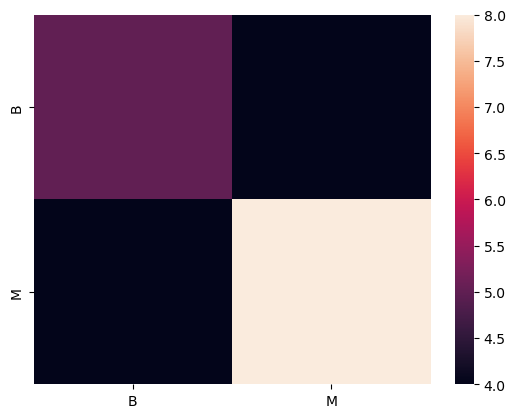

In [47]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [48]:
y_score = log.decision_function(test_features)
y_score

array([-0.53249351,  0.81240022,  0.80866463,  2.69811563, -0.76271231,
        0.40901657,  5.15267585, -0.54235371,  0.69024025, -0.84896235,
        3.26704939, -0.54486385, -1.32199904,  0.90184047,  2.26026217,
        0.30219915, -0.80290623, -0.95784062,  0.00848762,  0.17979615,
       -1.28506113])

In [49]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

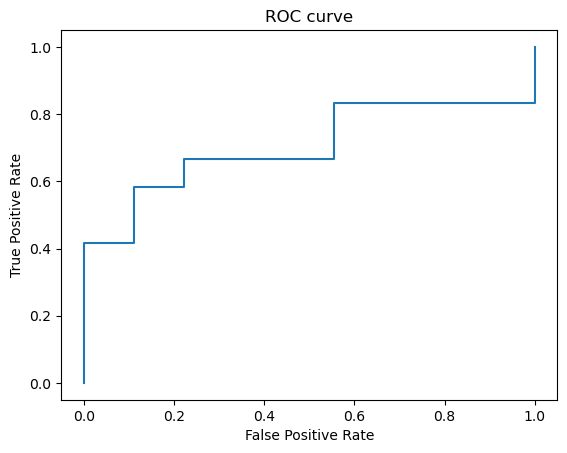

In [50]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly_features = PolynomialFeatures(degree=3)

In [53]:
train_features_ = poly_features.fit_transform(train_features)

In [54]:
log_ = LogisticRegression(max_iter = 10000000)

In [55]:
log_.fit(train_features_, train_target)

LogisticRegression(max_iter=10000000)

In [56]:
test_features_ = poly_features.transform(test_features)
log_.score(test_features_,test_target)

0.6666666666666666